## Decision Tree

## Tiatnic Survival Dataset

In [283]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [239]:
#Load the data sets- train and test 

df = pd.read_csv("train.csv")

In [240]:
#Look at top values of train data 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
#Print the column names of train data

print("Column names of data : " , df.columns.to_list())

Column names of data :  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [242]:
#Print the dimension of train and test data

print(f"Dimension of data : {df.shape} ")

Dimension of data : (891, 12) 


In [243]:
#Print the number of missing values in each column of train and test data

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

    countplot() → Directly counts occurrences of categories (X: category, Y: count).
    barplot() → Requires manual aggregation (X: category, Y: any numerical value like count, mean, sum, etc.).

Use countplot() for quick counts, barplot() for more control.

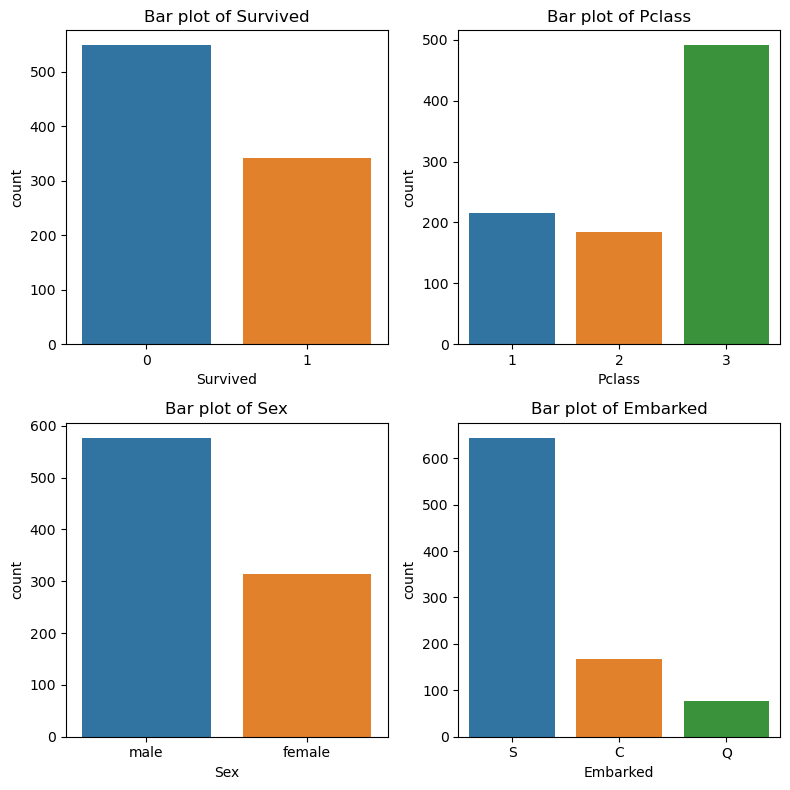

In [244]:
#Barchart of Survived, Pclass, Sex, Embarked

cols = ["Survived", "Pclass", "Sex", "Embarked"]

fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.flatten()

for i,col in enumerate(cols):
    cur_ax = axes[i]
    sns.countplot(data=df,x=col, ax=cur_ax)
    cur_ax.set_title(f"Bar plot of {col}")

plt.tight_layout()
plt.show()
    

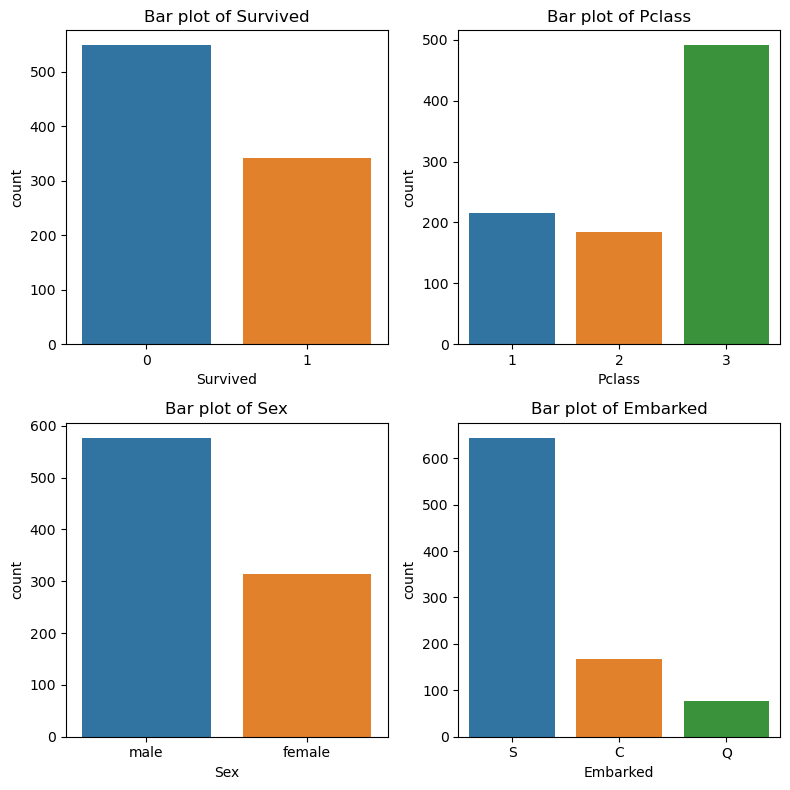

In [245]:
# using same bar plot instead of count plot

fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()

for i,col in enumerate(cols):
    cur_ax = axes[i]
    new_count_df = df[col].value_counts().reset_index()
    sns.barplot(data=new_count_df,x=col,y="count",ax = cur_ax)
    cur_ax.set_title(f"Bar plot of {col}")

plt.tight_layout()
plt.show()
    

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


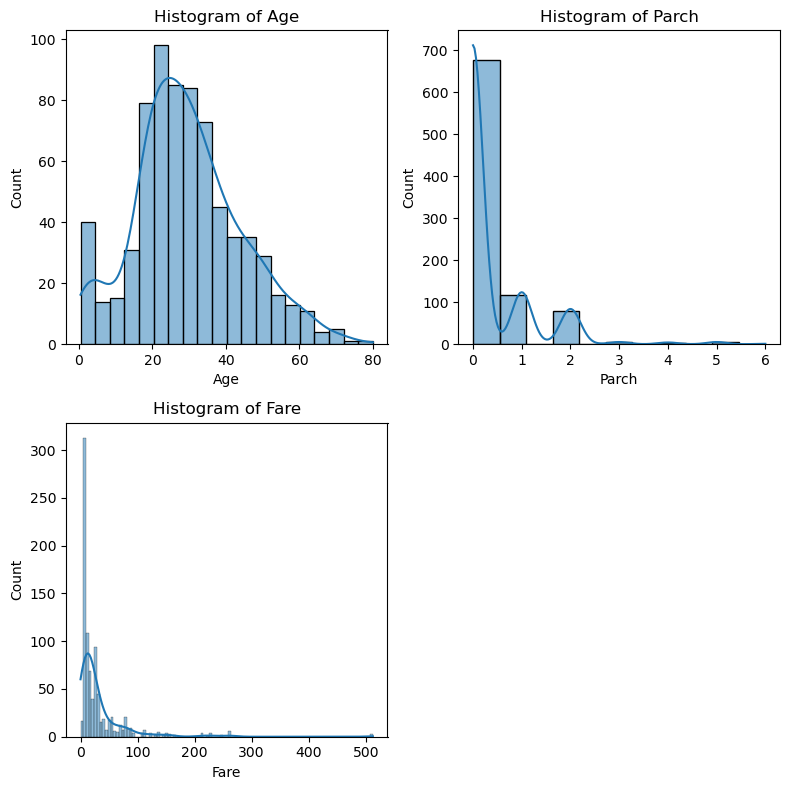

In [246]:
#Histogram of Age, Parch, Fare


cols = ["Age", "Parch", "Fare"]

fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()

for i, col in enumerate(cols):
    cur_ax = axes[i]
    sns.histplot(df[col],kde=True,ax = cur_ax)
    cur_ax.set_title(f"Histogram of {col}")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


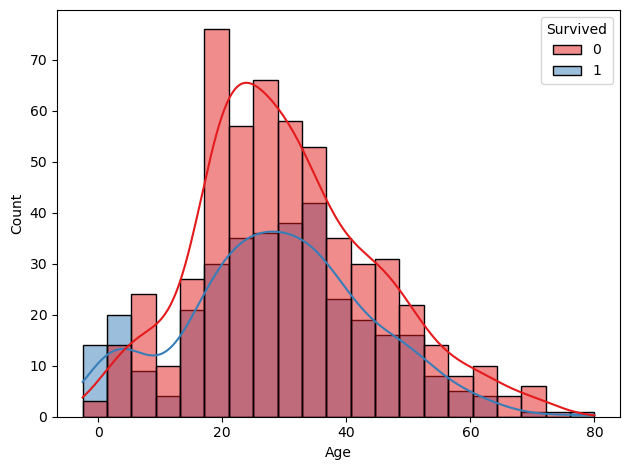

In [312]:
#Plot histogram of age for survived and did not survived class

sns.histplot(data=df,x="Age",kde=True,palette="Set1",hue="Survived")
plt.tight_layout()
plt.show()

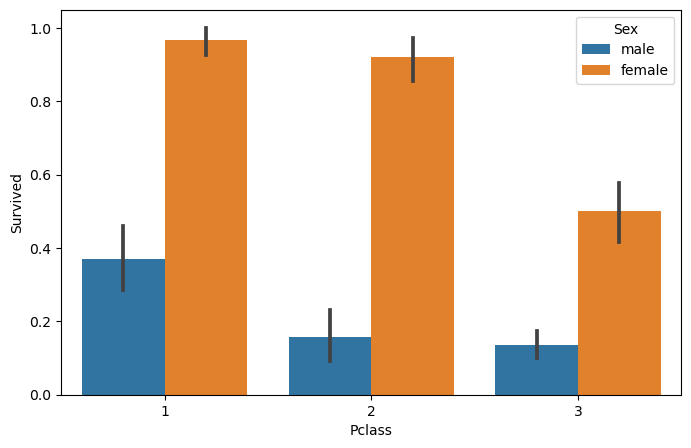

In [248]:
#Count class and gender wise survival rate - plot with appropriate chart

plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Pclass",y="Survived",hue="Sex")
plt.show()

/tmp/ipykernel_3966/639291750.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="Age",hue="Sex",shade=True,palette="Set2",common_norm=False)
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


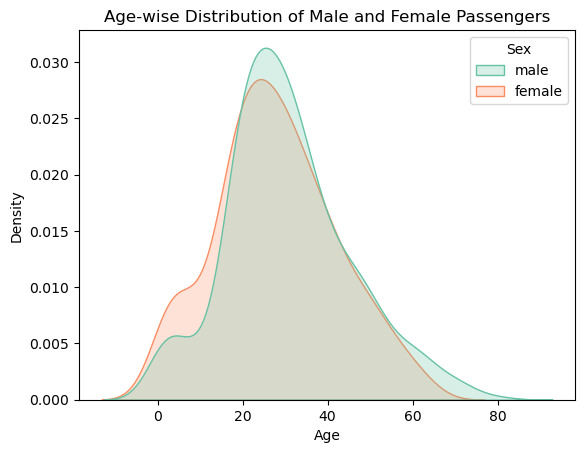

In [249]:
#Age wise Distribution of Male and Female passengers


# one way using: KDE plot

sns.kdeplot(data=df,x="Age",hue="Sex",shade=True,palette="Set2",common_norm=False)
plt.title("Age-wise Distribution of Male and Female Passengers")
plt.show()

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


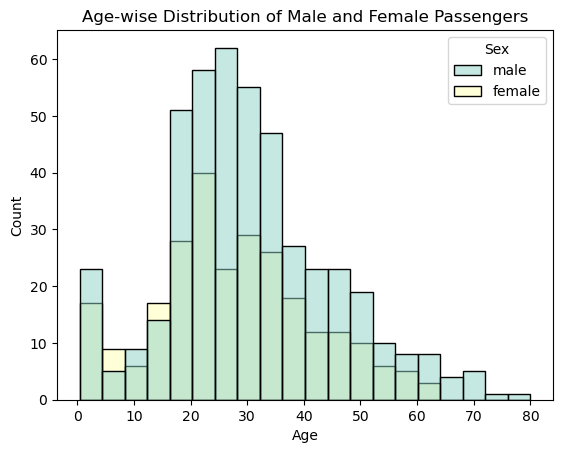

In [250]:
#Age wise Distribution of Male and Female passengers



# another way using : Histogram plot


sns.histplot(data=df,x="Age",hue="Sex",palette="Set3")
plt.title("Age-wise Distribution of Male and Female Passengers")
plt.show()


/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


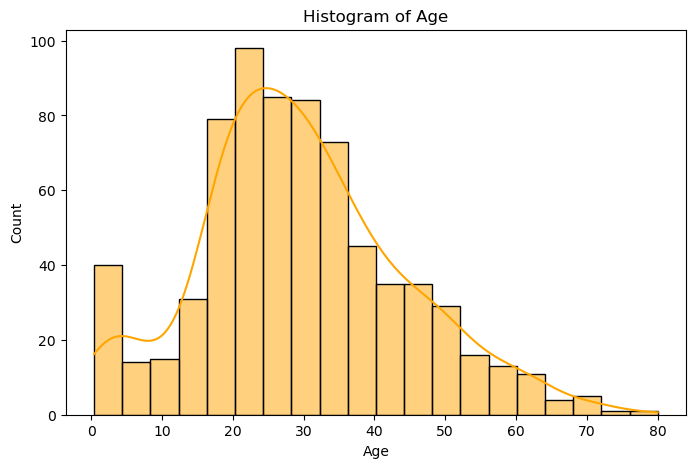

In [251]:
#Histogram of Age of the given data set(sample)

plt.figure(figsize=(8,5))
sns.histplot(data=df,x="Age",kde=True,color="orange")
plt.title("Histogram of Age")
plt.show()

## Handling Missing Values

In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
#Replace the msiing values in Embarked column by 'S'

df["Embarked"].fillna("S",inplace=True)


In [254]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [255]:
#Impute the missing values in Fare column with median value


df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [256]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [257]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

mean_age = df["Age"].mean()
std_age = df["Age"].std()

print(mean_age, std_age)

# x is the each value in Age col
def fill_missing(x):
    if pd.isnull(x):
        # at generates random numbers drawn from a normal (Gaussian) distribution 
        return np.random.normal(mean_age,std_age)
    return x

df["Age"] = df["Age"].apply(fill_missing)

mean_age = df["Age"].mean()
std_age = df["Age"].std()

print(mean_age, std_age)


29.69911764705882 14.526497332334044
29.82564028290151 14.619008511671383


## Feature Engineering - Creating new features

In [258]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df["FamilySize"] = df["Parch"] + df["SibSp"] + 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [259]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df["IsAlone"] = df["FamilySize"] == 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


## Create a new attribute Has_cabin using the attribue Cabin. 



In [260]:
#if Cabin == NaN the Has_cabin = False else Has_cabin = True

df["Has_cabin"] = df["Cabin"].notna()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,False


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    bool   
 14  Has_cabin    891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 92.4+ KB


In [262]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

df.drop(columns=["Name", "PassengerId","Ticket","Cabin"],inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.0,1,0,7.2500,S,2,False,False
1,1,1,female,38.0,1,0,71.2833,C,2,False,True
2,1,3,female,26.0,0,0,7.9250,S,1,True,False
3,1,1,female,35.0,1,0,53.1000,S,2,False,True
4,0,3,male,35.0,0,0,8.0500,S,1,True,False


## Model Building

In [263]:
#Prepare X and y

x = df.drop(columns="Survived")
y = df["Survived"]

x.head(), y.head()

(   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  IsAlone  \
 0       3    male  22.0      1      0   7.2500        S           2    False   
 1       1  female  38.0      1      0  71.2833        C           2    False   
 2       3  female  26.0      0      0   7.9250        S           1     True   
 3       1  female  35.0      1      0  53.1000        S           2    False   
 4       3    male  35.0      0      0   8.0500        S           1     True   
 
    Has_cabin  
 0      False  
 1       True  
 2      False  
 3       True  
 4      False  ,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [264]:
# Label encoding of categorical features

cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    encoder = LabelEncoder()
    x[col] = encoder.fit_transform(df[col])

In [265]:
# concat df_categorical with original df


/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

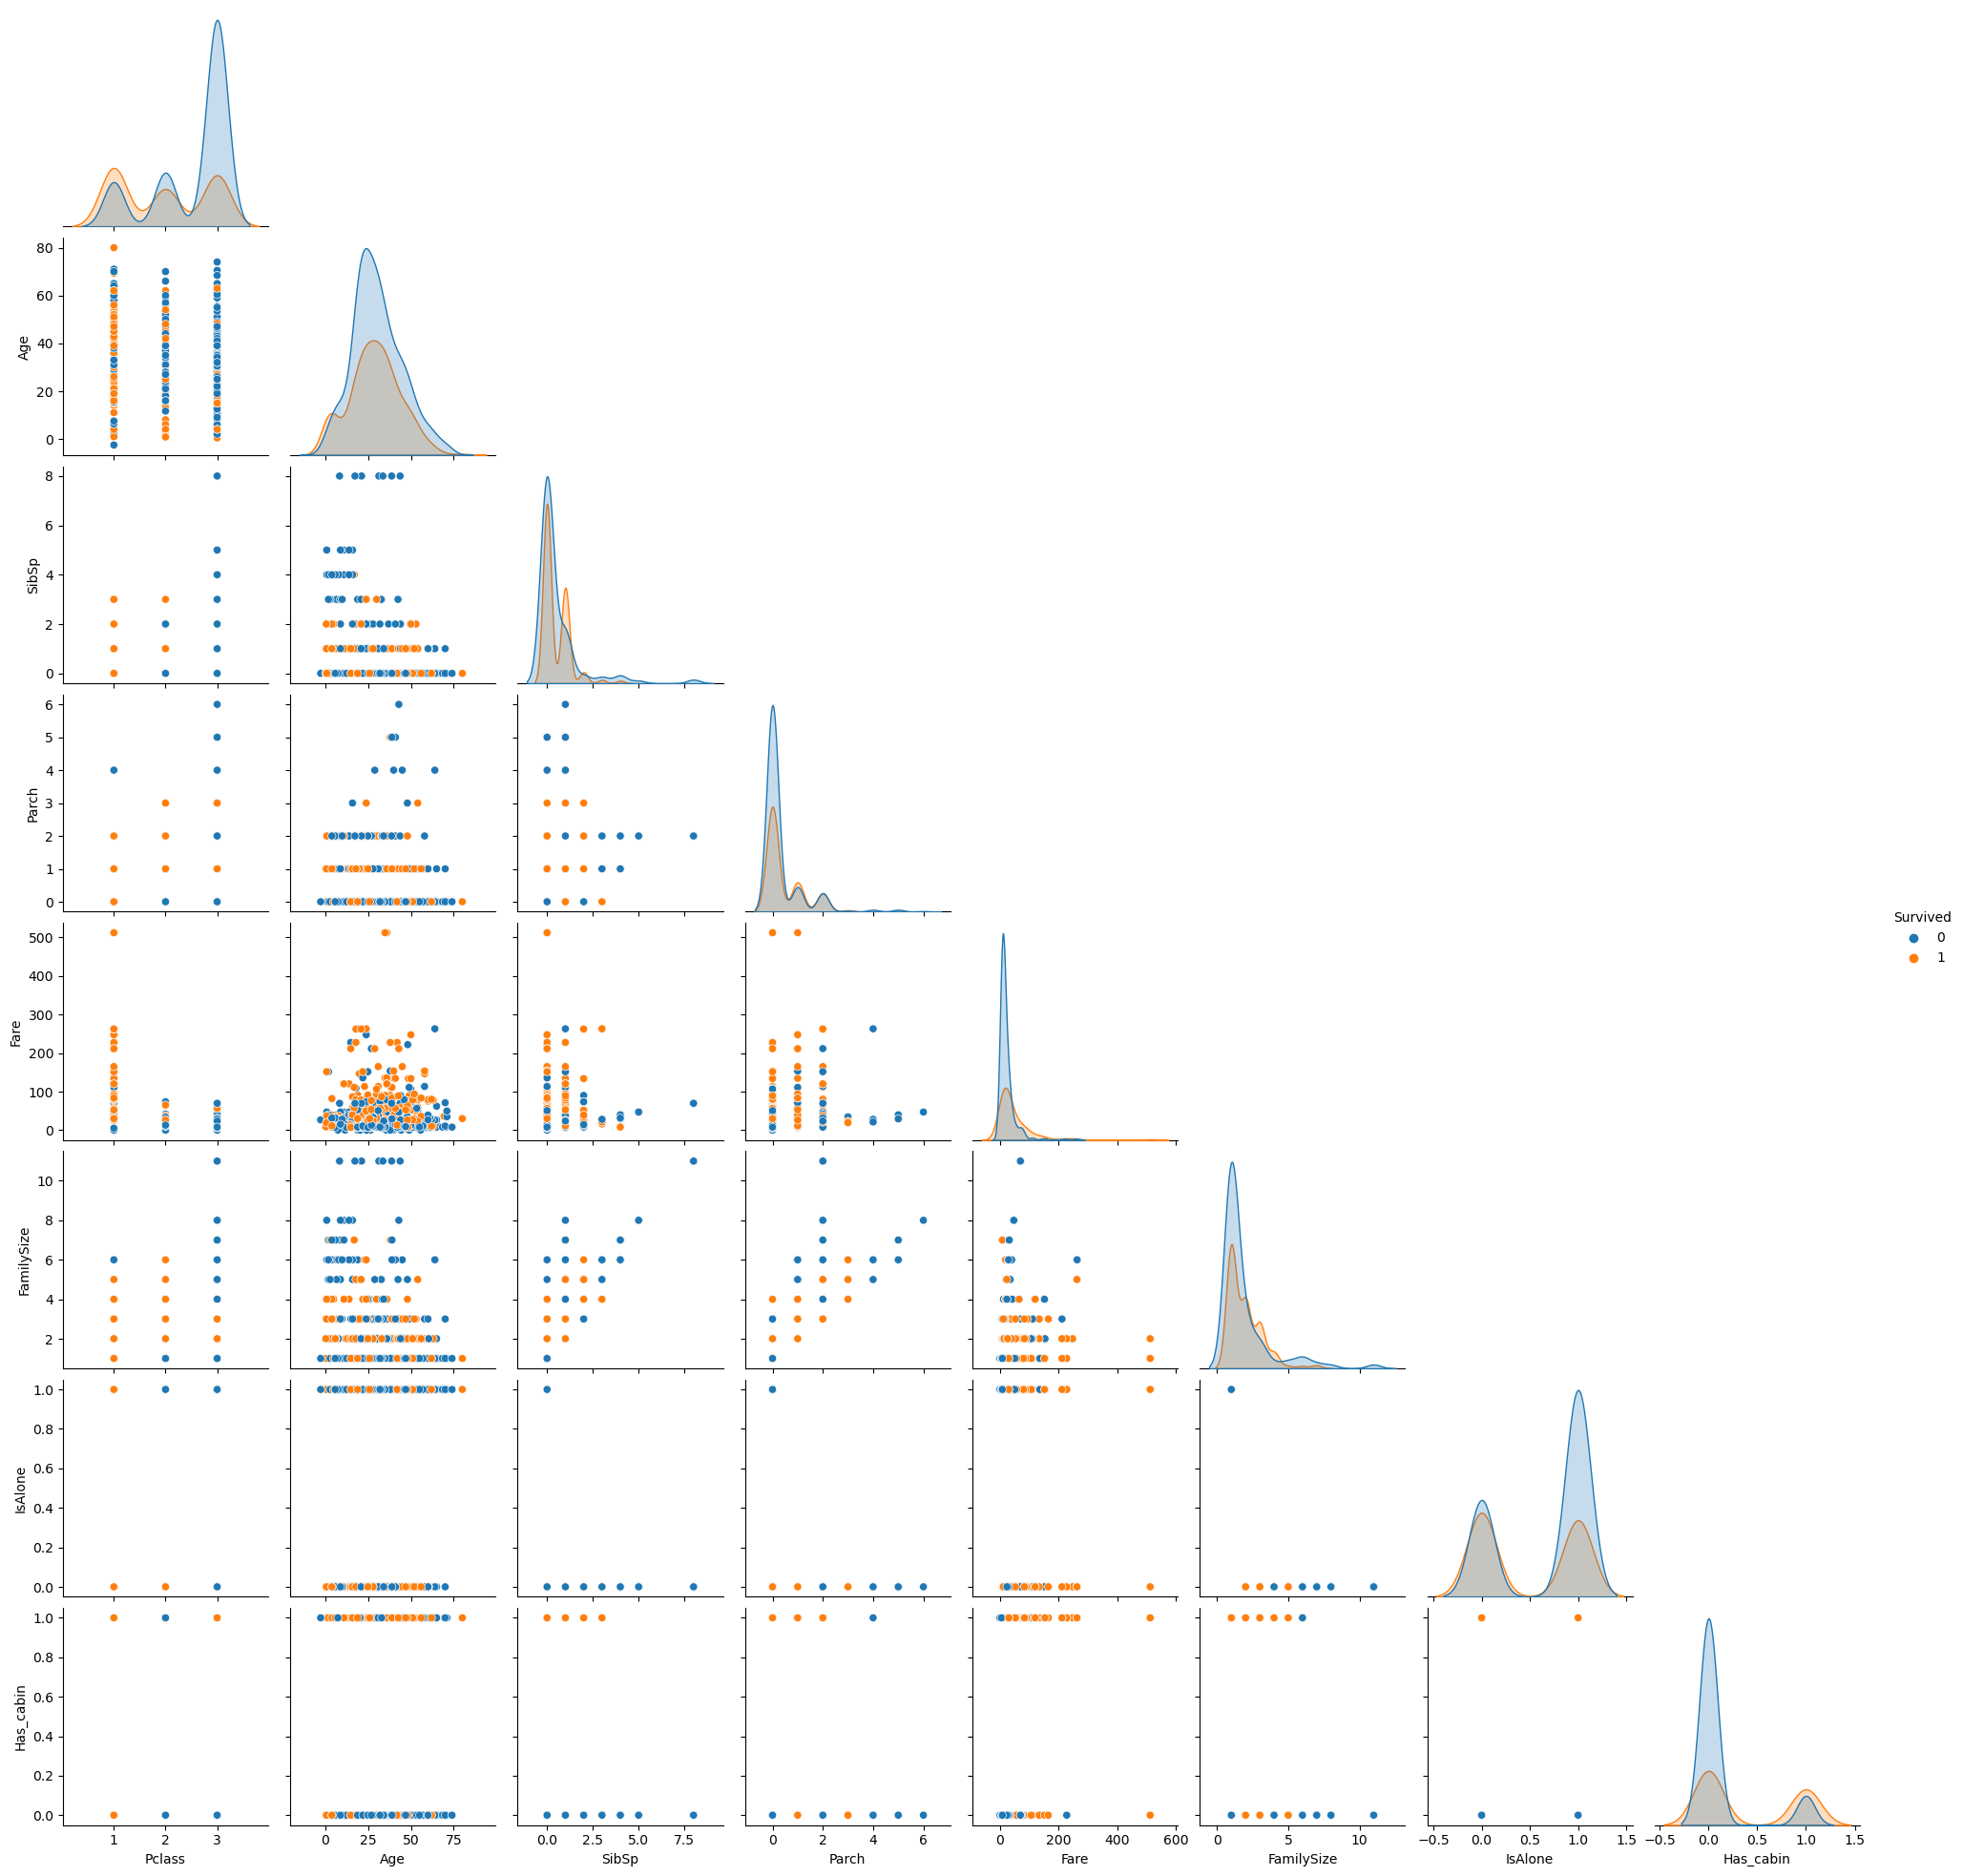

In [266]:
#Do a pairplot of all features


sns.pairplot(df,corner=True,hue="Survived")
plt.show()

In [274]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

x_train.shape, x_test.shape

((801, 10), (90, 10))

In [275]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,3,1,22.0,1,0,7.2500,2,2,False,False
1,1,0,38.0,1,0,71.2833,0,2,False,True
2,3,0,26.0,0,0,7.9250,2,1,True,False
3,1,0,35.0,1,0,53.1000,2,2,False,True
4,3,1,35.0,0,0,8.0500,2,1,True,False


In [276]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

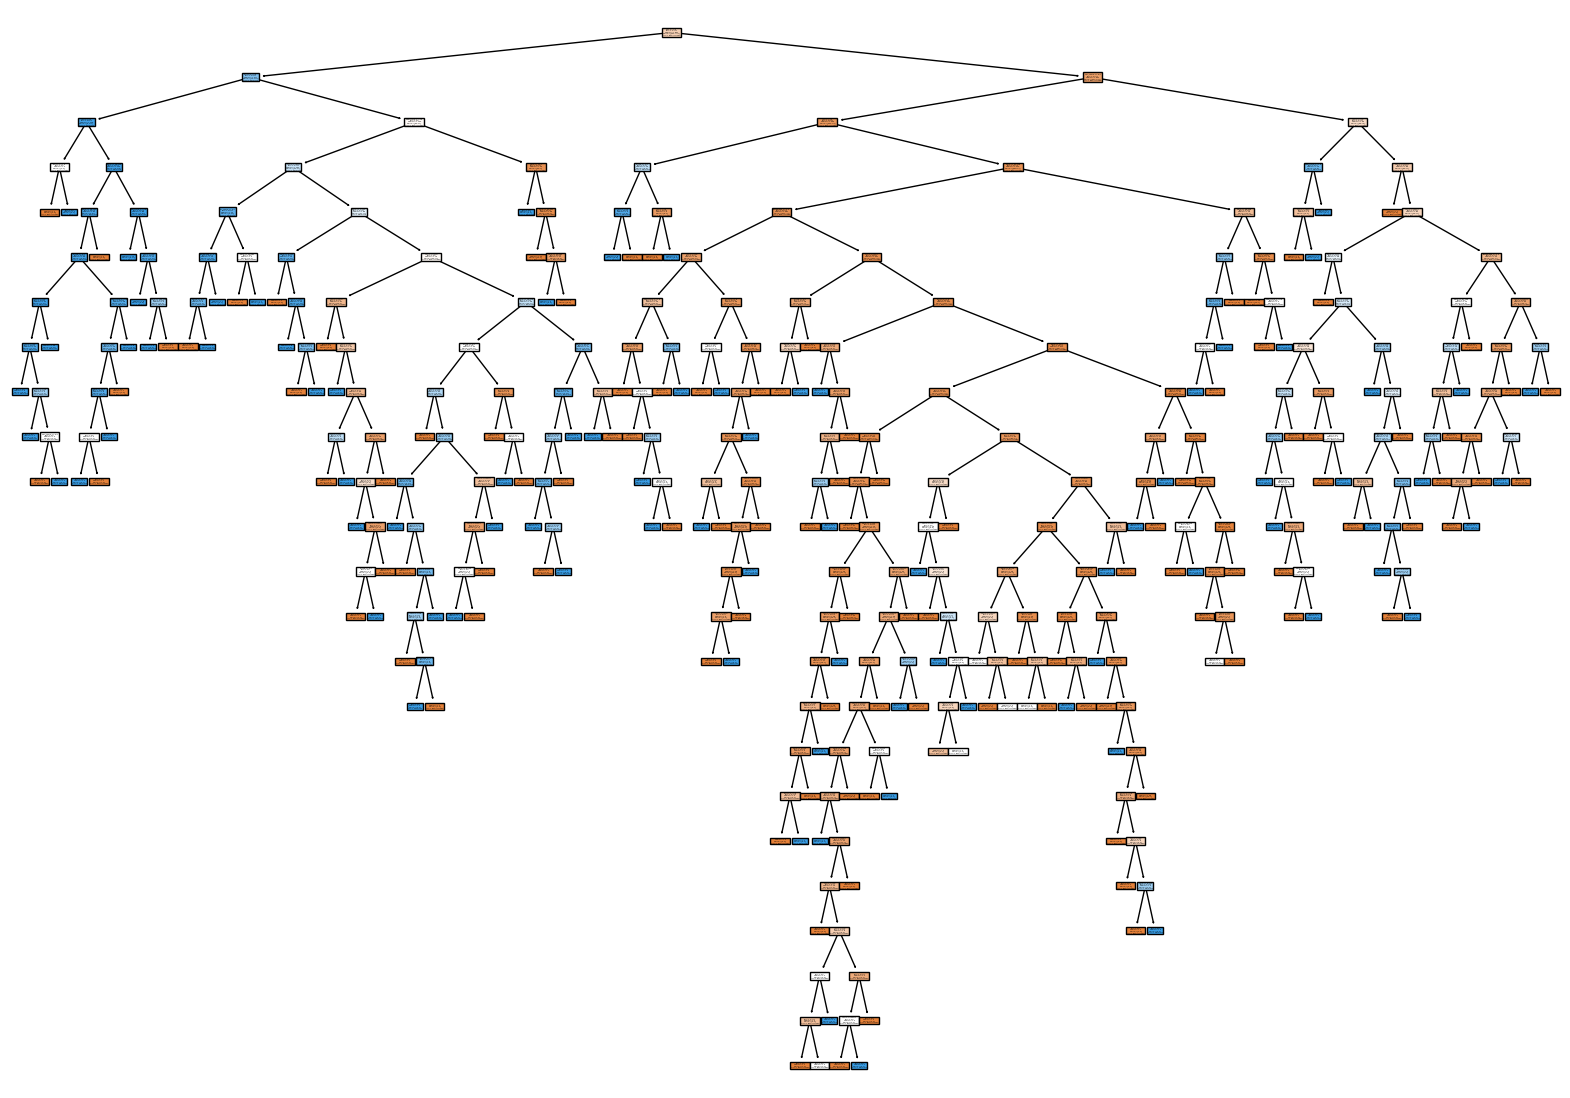

In [281]:
#Print the tree

# Importing required packages for visualization

plt.figure(figsize=(20,14))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived","Survived"],filled=True)
plt.show()

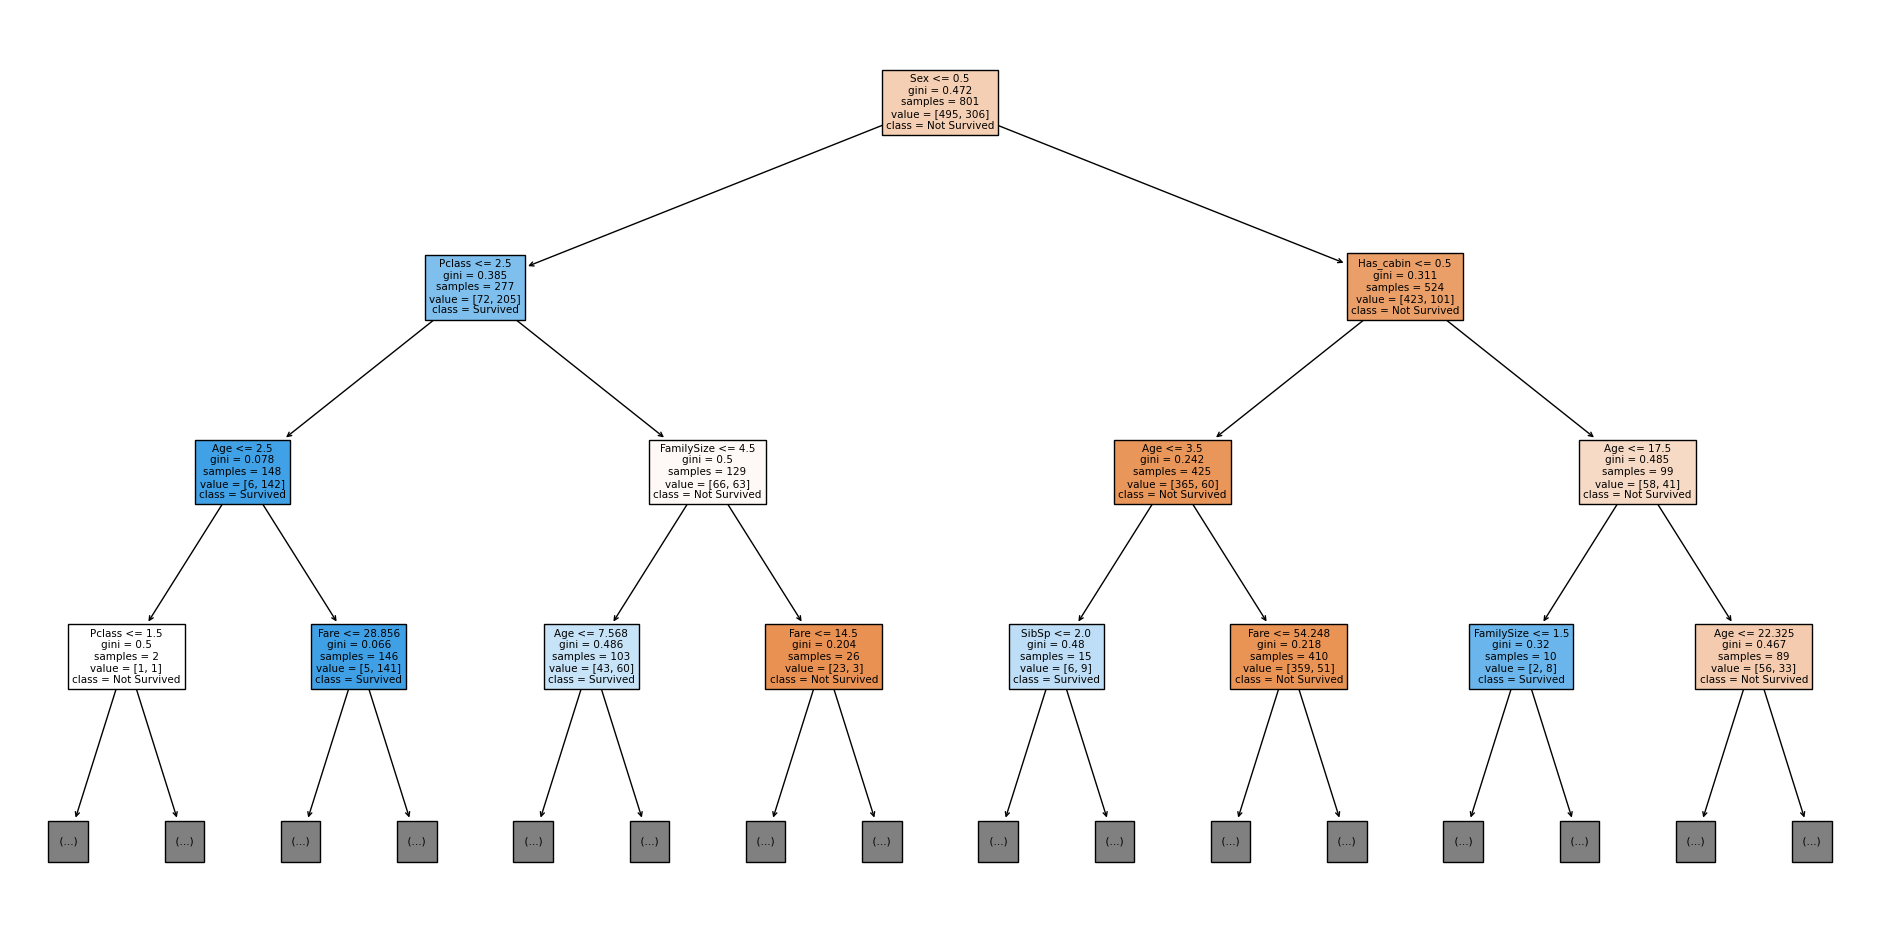

In [282]:
# plotting tree with max_depth=3

plt.figure(figsize=(24,12))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived", "Survived"],filled=True,max_depth=3)
plt.show()

In [303]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

y_pred = model.predict(x_test)


print(f"Precision score : {precision_score(y_test,y_pred):.2f}")
print(f"Recall score: {recall_score(y_test,y_pred):.2f}")
print(f"F1 score :  {f1_score(y_test,y_pred):.2f}")
print("\nClassification Report : \n",classification_report(y_test,y_pred) )


Precision score : 0.70
Recall score: 0.83
F1 score :  0.76

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.70      0.83      0.76        36

    accuracy                           0.79        90
   macro avg       0.79      0.80      0.79        90
weighted avg       0.80      0.79      0.79        90



In [300]:
# Printing confusion matrix and accuracy

print("Cofusion matrix : \n",confusion_matrix(y_test,y_pred))
print(f"\nAccuracy score : {accuracy_score(y_test,y_pred):.2f}")

Cofusion matrix : 
 [[41 13]
 [ 6 30]]

Accuracy score : 0.79
